In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# suppressing warnings
import warnings
warnings.filterwarnings('ignore') #Importing Necessary Libraries

In [2]:
df_hr = pd.DataFrame(pd.read_excel('Talent Analytics Dataset.xlsx')) #Loading in Dataset
target= 'Status' #Setting Target Variable 

In [3]:
df_hr.shape #Number of Rows and Columns in the Dataset 

(12333, 17)

In [4]:
percent_missing = df_hr.isnull().sum() * 100 / len(df_hr)
percent_missing #Check for Missing Values 

Candidate Ref                   0.000000
DOJ Extended                    0.000000
Duration to accept offer       22.046542
Notice period                   0.000000
Offered band                    0.000000
Pecent hike expected in CTC     6.056920
Percent hike offered in CTC     4.832563
Percent difference CTC          6.900186
Joining Bonus                   0.000000
Candidate relocate actual       0.000000
Gender                          0.000000
Candidate Source                0.000000
Rex in Yrs                      0.000000
LOB                             0.000000
Location                        0.000000
Age                             0.000000
Status                          0.000000
dtype: float64

In [5]:
df_hr.describe() #Mean, Median, Standard Deviation in Numeric Columns of the dataset

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,1.233300e+04,9614.000000,12333.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000
mean,2.872888e+06,21.189619,37.943323,41.837663,37.772016,-2.078916,4.160788,30.232304
std,5.099726e+05,26.410351,24.526587,29.435844,35.593317,19.997159,2.810108,4.178853
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000
25%,2.378256e+06,2.000000,30.000000,25.000000,20.000000,-9.090000,3.000000,27.000000
50%,2.820675e+06,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000
75%,3.338197e+06,32.000000,60.000000,52.170000,47.060000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000


In [6]:
df_hr.mode().head(1) #Mode of the Dataset 

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2109586,No,1.0,30.0,E1,42.86,42.86,0.0,No,No,Male,Direct,3.0,INFRA,Chennai,34.0,Joined


In [7]:
df_hr.corr() #Correlations in the Dataset 

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
Candidate Ref,1.000000,-0.026692,-0.221621,0.010554,0.003662,0.008575,-0.125276,0.355756
Duration to accept offer,-0.026692,1.000000,0.326540,0.018304,0.009044,-0.007847,0.095212,0.010302
Notice period,-0.221621,0.326540,1.000000,0.047160,-0.004985,-0.061238,0.270473,-0.071338
Pecent hike expected in CTC,0.010554,0.018304,0.047160,1.000000,0.651497,-0.177674,-0.165577,-0.168325
Percent hike offered in CTC,0.003662,0.009044,-0.004985,0.651497,1.000000,0.603027,-0.102241,-0.099320
Percent difference CTC,0.008575,-0.007847,-0.061238,-0.177674,0.603027,1.000000,0.026684,0.044472
Rex in Yrs,-0.125276,0.095212,0.270473,-0.165577,-0.102241,0.026684,1.000000,0.481631
Age,0.355756,0.010302,-0.071338,-0.168325,-0.099320,0.044472,0.481631,1.000000


In [8]:
df_hr.cov() #Covariance in the Dataset

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
Candidate Ref,2.600721e+11,-344551.733268,-2.772006e+06,157253.220607,65993.932037,86864.832110,-179529.871010,758151.026446
Duration to accept offer,-3.445517e+05,697.506639,1.968370e+02,14.112901,8.478346,-3.982166,6.489460,1.126334
Notice period,-2.772006e+06,196.837029,6.015535e+02,33.450447,-4.279058,-29.356333,18.641615,-7.311679
Pecent hike expected in CTC,1.572532e+05,14.112901,3.345045e+01,866.468923,684.261537,-105.130121,-13.502857,-20.422610
Percent hike offered in CTC,6.599393e+04,8.478346,-4.279058e+00,684.261537,1266.884223,429.960892,-10.176624,-14.684310
Percent difference CTC,8.686483e+04,-3.982166,-2.935633e+01,-105.130121,429.960892,399.886379,1.483615,3.675312
Rex in Yrs,-1.795299e+05,6.489460,1.864161e+01,-13.502857,-10.176624,1.483615,7.896704,5.655801
Age,7.581510e+05,1.126334,-7.311679e+00,-20.422610,-14.684310,3.675312,5.655801,17.462816


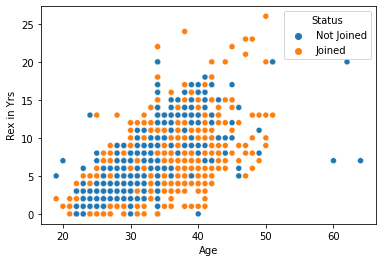

In [9]:
ax = sns.scatterplot(x="Age", y="Rex in Yrs", 
                hue = 'Status', data=df_hr) #Scatterplot of Age vs Relevant Expereince detailed by status of join

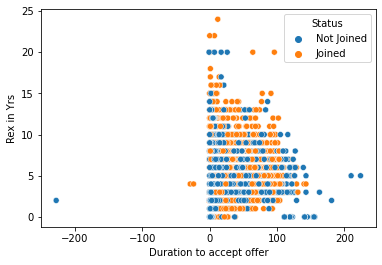

In [10]:
ay = sns.scatterplot(x="Duration to accept offer", y="Rex in Yrs", 
                hue = 'Status', data=df_hr) #Scatterplot of Duration to accept offer vs Relevant Expereince detailed by status of join

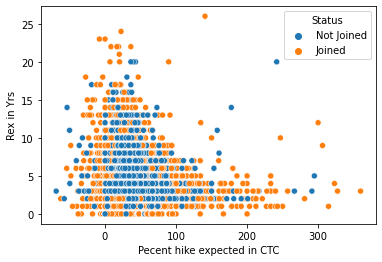

In [11]:
az = sns.scatterplot(x="Pecent hike expected in CTC", y="Rex in Yrs", 
                hue = 'Status', data=df_hr) #Scatterplot of Pecent hike expected in CTC vs Relevant Expereince detailed by status of join

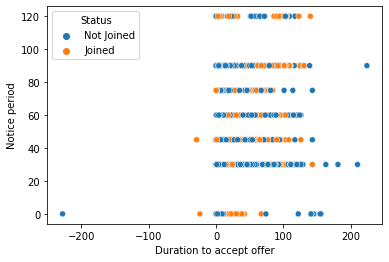

In [12]:
aw = sns.scatterplot(x="Duration to accept offer", y="Notice period",  
                hue = 'Status', data=df_hr) #Scatterplot of Duration to accept offer vs Notice period detailed by status of join

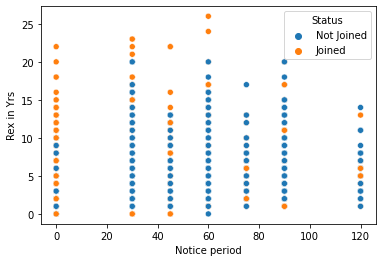

In [13]:
ar = sns.scatterplot(x="Notice period", y="Rex in Yrs", 
                hue = 'Status', data=df_hr) #Scatterplot of Notice period vs Relevant Expereince detailed by status of join

<AxesSubplot:>

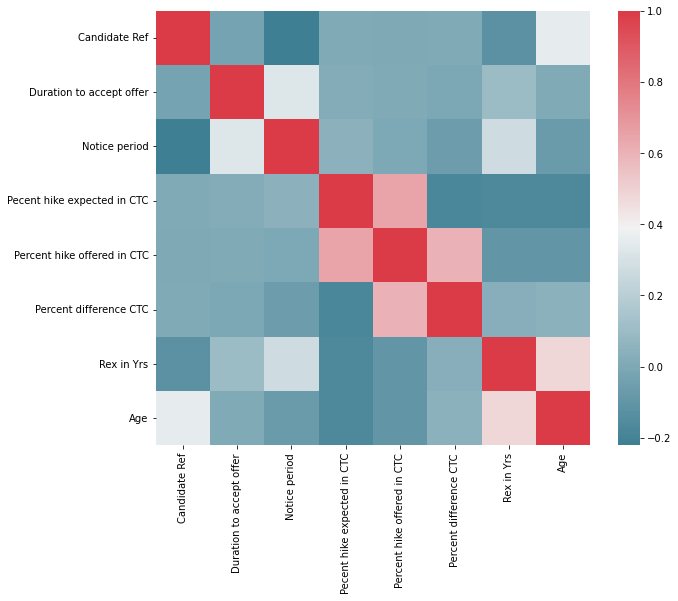

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_hr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax) #Correlation Matrix for all Numeric Variables

In [15]:
df_new = df_hr #New Dataset for preprocessing 

In [16]:
from scipy import stats #Removing outliers 
df_new = df_new[(np.abs(stats.zscore(df_new['Notice period'])) < 3)]
df_new = df_new[(np.abs(stats.zscore(df_new['Rex in Yrs'])) < 3)]
df_new = df_new[(np.abs(stats.zscore(df_new['Age'])) < 3)]

In [17]:
df_new 

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,3258076,No,1.0,30,E1,-68.83,24.68,300.00,No,No,Male,Agency,3,ERS,Chennai,24,Not Joined
1,2535545,Yes,54.0,90,E3,28.57,414.29,300.00,Yes,No,Male,Employee Referral,11,ERS,Bangalore,34,Joined
2,2550678,No,28.0,30,E1,11.90,316.67,272.34,No,No,Female,Direct,3,ERS,Chennai,25,Joined
3,3289177,No,2.0,30,E2,10.00,275.00,240.91,No,No,Male,Direct,8,INFRA,Chennai,36,Joined
4,2534384,Yes,55.0,90,E3,50.00,400.00,233.33,No,No,Male,Employee Referral,10,INFRA,Noida,38,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,3691976,Yes,NaN,0,E3,NaN,NaN,NaN,No,No,Male,Direct,11,BSERV,Noida,34,Joined
12329,3721706,No,NaN,60,E2,NaN,-1.67,NaN,No,No,Male,Agency,10,ERS,Noida,34,Not Joined
12330,3722458,No,1.0,45,E2,NaN,NaN,NaN,No,No,Male,Direct,8,INFRA,Chennai,34,Joined
12331,3758832,No,NaN,0,E0,NaN,42.86,NaN,No,No,Female,Direct,0,BSERV,Chennai,34,Not Joined


In [18]:
df_new = df_new.drop('Candidate Ref', axis = 1)
df_new = df_new.drop('Location', axis = 1) #Dropping unnecessary Column 

In [19]:
df_new

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Age,Status
0,No,1.0,30,E1,-68.83,24.68,300.00,No,No,Male,Agency,3,ERS,24,Not Joined
1,Yes,54.0,90,E3,28.57,414.29,300.00,Yes,No,Male,Employee Referral,11,ERS,34,Joined
2,No,28.0,30,E1,11.90,316.67,272.34,No,No,Female,Direct,3,ERS,25,Joined
3,No,2.0,30,E2,10.00,275.00,240.91,No,No,Male,Direct,8,INFRA,36,Joined
4,Yes,55.0,90,E3,50.00,400.00,233.33,No,No,Male,Employee Referral,10,INFRA,38,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,Yes,NaN,0,E3,NaN,NaN,NaN,No,No,Male,Direct,11,BSERV,34,Joined
12329,No,NaN,60,E2,NaN,-1.67,NaN,No,No,Male,Agency,10,ERS,34,Not Joined
12330,No,1.0,45,E2,NaN,NaN,NaN,No,No,Male,Direct,8,INFRA,34,Joined
12331,No,NaN,0,E0,NaN,42.86,NaN,No,No,Female,Direct,0,BSERV,34,Not Joined


In [20]:
indexNames = df_new[ df_new['Duration to accept offer'] < 0 ].index
df_new.drop(indexNames , inplace=True, axis=0) #Dropping negative values in duration to accept column

In [21]:
df_new

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Age,Status
0,No,1.0,30,E1,-68.83,24.68,300.00,No,No,Male,Agency,3,ERS,24,Not Joined
1,Yes,54.0,90,E3,28.57,414.29,300.00,Yes,No,Male,Employee Referral,11,ERS,34,Joined
2,No,28.0,30,E1,11.90,316.67,272.34,No,No,Female,Direct,3,ERS,25,Joined
3,No,2.0,30,E2,10.00,275.00,240.91,No,No,Male,Direct,8,INFRA,36,Joined
4,Yes,55.0,90,E3,50.00,400.00,233.33,No,No,Male,Employee Referral,10,INFRA,38,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,Yes,NaN,0,E3,NaN,NaN,NaN,No,No,Male,Direct,11,BSERV,34,Joined
12329,No,NaN,60,E2,NaN,-1.67,NaN,No,No,Male,Agency,10,ERS,34,Not Joined
12330,No,1.0,45,E2,NaN,NaN,NaN,No,No,Male,Direct,8,INFRA,34,Joined
12331,No,NaN,0,E0,NaN,42.86,NaN,No,No,Female,Direct,0,BSERV,34,Not Joined


In [22]:
[sum(df_new[i].isnull()) for i in df_new.columns] #Number of missing values per column 

[0, 2607, 0, 0, 697, 556, 791, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
numerical_var = list(set(df_new.columns) - set(df_new.dtypes[df_new.dtypes == object].index)) #Selecting numerical Variables

In [24]:
df_new[numerical_var] = df_new[numerical_var].fillna(df_new[numerical_var].median(), inplace = False) #Imputing Missing Values with Median

In [25]:
categorical_var = list(set(df_new.dtypes[df_new.dtypes == object].index) - set(['Status'])) #Selecting categorical Variables 

In [26]:
dummy_cat_df = pd.get_dummies(df_new[categorical_var], drop_first=True) # Converting categorical variables into dummy variables

In [27]:
# Drops categorical variables from the df

df_new = df_new.drop(categorical_var, axis = 1) # Adds the newly created dummy variables instead

df_new = pd.concat([df_new, dummy_cat_df], axis = 1)

In [28]:
df_new

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Status,Candidate Source_Direct,Candidate Source_Employee Referral,...,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,LOB_SALES,Candidate relocate actual_Yes,Joining Bonus_Yes,Gender_Male
0,1.0,30,-68.83,24.68,300.00,3,24,Not Joined,0,0,...,0,1,0,0,0,0,0,0,0,1
1,54.0,90,28.57,414.29,300.00,11,34,Joined,0,1,...,0,1,0,0,0,0,0,0,1,1
2,28.0,30,11.90,316.67,272.34,3,25,Joined,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,30,10.00,275.00,240.91,8,36,Joined,1,0,...,0,0,0,0,1,0,0,0,0,1
4,55.0,90,50.00,400.00,233.33,10,38,Joined,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,9.0,0,39.30,34.79,0.00,11,34,Joined,1,0,...,0,0,0,0,0,0,0,0,0,1
12329,9.0,60,39.30,-1.67,0.00,10,34,Not Joined,0,0,...,0,1,0,0,0,0,0,0,0,1
12330,1.0,45,39.30,34.79,0.00,8,34,Joined,1,0,...,0,0,0,0,1,0,0,0,0,1
12331,9.0,0,39.30,42.86,0.00,0,34,Not Joined,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_new.loc[df_new['Status'] == "Joined", 'Status'] = 1 #Transforming target variable to binary
df_new.loc[df_new['Status'] == "Not Joined", 'Status'] = 0

In [30]:
df_new

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Status,Candidate Source_Direct,Candidate Source_Employee Referral,...,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,LOB_SALES,Candidate relocate actual_Yes,Joining Bonus_Yes,Gender_Male
0,1.0,30,-68.83,24.68,300.00,3,24,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,54.0,90,28.57,414.29,300.00,11,34,1,0,1,...,0,1,0,0,0,0,0,0,1,1
2,28.0,30,11.90,316.67,272.34,3,25,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,30,10.00,275.00,240.91,8,36,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4,55.0,90,50.00,400.00,233.33,10,38,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,9.0,0,39.30,34.79,0.00,11,34,1,1,0,...,0,0,0,0,0,0,0,0,0,1
12329,9.0,60,39.30,-1.67,0.00,10,34,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12330,1.0,45,39.30,34.79,0.00,8,34,1,1,0,...,0,0,0,0,1,0,0,0,0,1
12331,9.0,0,39.30,42.86,0.00,0,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_new['Status'].value_counts()

1    8525
0    3477
Name: Status, dtype: int64

In [32]:
input_var  = set(df_new.columns) - set(['Status'])
X = df_new[input_var]
Y = df_new['Status']
Y=Y.astype('int')

In [33]:
from imblearn.over_sampling import SMOTE
 
x_resam,y_resam = SMOTE(k_neighbors=5).fit_resample(X,Y) #resample fit

In [34]:
df_new = pd.concat([x_resam, y_resam], axis=1)

In [35]:
from sklearn.model_selection import train_test_split #splitting into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto')
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [38]:
#random forest
rf = RandomForestClassifier(n_estimators=10000, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=10000, random_state=0)

In [39]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [41]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

In [42]:
# accuracy, sensitivity, aand specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)


# accuracy, sensitivity, aand specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

# accuracy, sensitivity, aand specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [43]:
# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.751073,0.335382,0.918852
Random Forest,0.761424,0.179104,0.996456
K-NN,0.741227,0.472344,0.849752


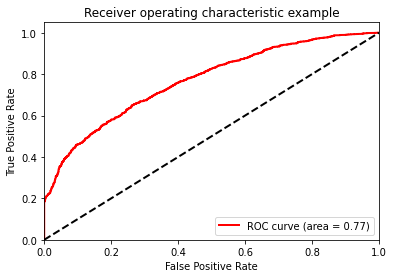

In [44]:
#Roc Curve
from sklearn.metrics import roc_curve, auc

score_Y_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
#Regression Summary
import statsmodels.api as sm
from sklearn.datasets import make_blobs

logit_model = sm.Logit(Y, sm.add_constant(X)).fit()
print (logit_model.summary())

         Current function value: 0.488565
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                12002
Model:                          Logit   Df Residuals:                    11971
Method:                           MLE   Df Model:                           30
Date:                Sat, 19 Mar 2022   Pseudo R-squ.:                  0.1883
Time:                        15:26:12   Log-Likelihood:                -5863.8
converged:                      False   LL-Null:                       -7223.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.1305      0.265     -4.269      0.000      -1.650      

/Users/pr472/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
